# Starbucks Capstone Challenge

### Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

### Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import math
import json
%matplotlib inline

### Reading the json files

In [4]:
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

### Visualizing json files and analyzing the features.

#### portfolio.json

In [9]:
print("Portfolio Size = {}".format(portfolio.shape))
portfolio.head()

Portfolio Size = (10, 6)


,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


#### profile.json file

In [10]:
print("Profile Size = {}".format(profile.shape))
profile.head()

Profile Size = (17000, 5)


,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


#### transcript.json

In [11]:
print("Transcript Size = {}".format(transcript.shape))
transcript.head()

Transcript Size = (306534, 4)


,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


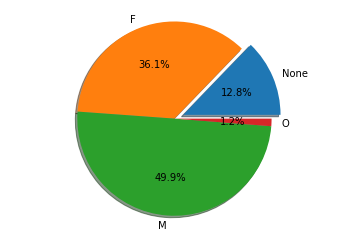

In [35]:
import matplotlib.pyplot as plt

explode = (0.1, 0, 0, 0)

fig1, x1 = plt.subplots()
x1.pie(total, labels = unique_genders, autopct='%1.1f%%', explode = explode, shadow = True)
x1.axis('equal')
plt.show()

In [47]:
transcript_event = transcript['event'].unique()

In [45]:
len(transcript['person'].unique())

17000

In [49]:
from collections import Counter
counts = Counter(transcript['event'].values)

In [50]:
total_event_counts = []
for event in transcript_event:
    total_event_counts.append(counts[event])
total_event_counts

[76277, 57725, 138953, 33579]

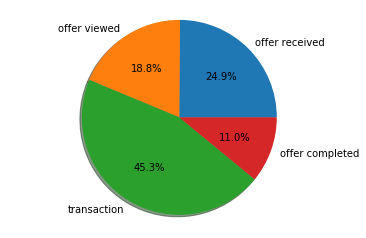

In [51]:
explode = (0.1, 0, 0, 0)

fig1, x1 = plt.subplots()
x1.pie(total_event_counts, labels = transcript_event, autopct='%1.1f%%',shadow = True)
x1.axis('equal')
plt.show()

In [57]:
transcript[transcript['event'] == 'transaction']['person'].unique().shape

(16578,)

In [58]:
transcript[transcript['event'] == 'transaction']['person'].shape

(138953,)